## Метод градиентного спуска
 * https://ru.wikipedia.org/wiki/Градиентный_спуск
 * https://habr.com/ru/post/307312/
 
Для простоты исследуется 2-мерный случай, функция одной переменной:
$$ f(x) = (x - 5)^2 $$ и её производная: $$ f'(x) = 2(x-5) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ф-ция:
def func(x):
    return (x - 5) ** 2

# Производная:
def func_derivative(x):
    return 2 * (x - 5)

График функции и её производной:

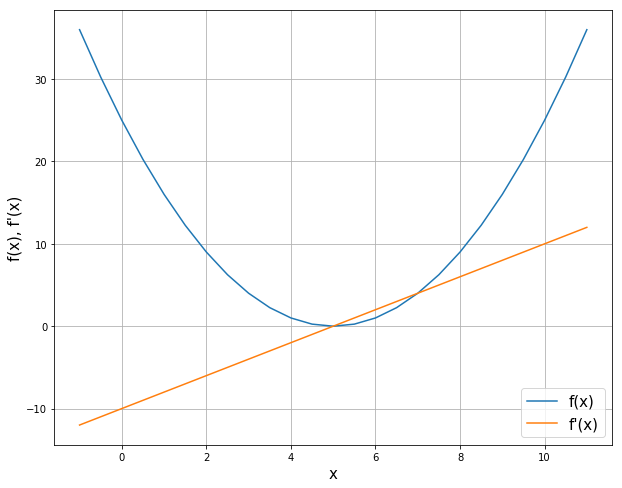

In [3]:
x_min, x_max, x_step = -1, 11.5, 0.5 
X = np.arange(x_min, x_max, x_step)
Y = [func(x) for x in X]
deriv_Y = [func_derivative(x) for x in X]
plt.figure(figsize=(10, 8))
plt.plot(X, Y, label = "f(x)")
plt.plot(X, deriv_Y, label = "f\'(x)")
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x), f\'(x)', fontsize = 15)
plt.grid()
plt.legend(fontsize = 15);

Алгоритм градиентного спуска:

---------------------------------------
Сошёлся на шаге № 17, размер шага=0.1:


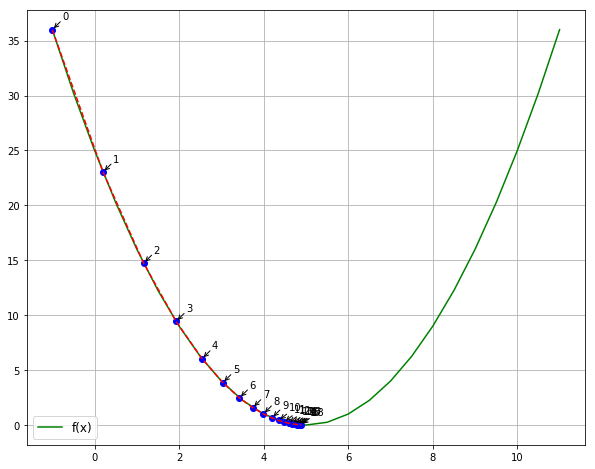

f(x_prev)=0.018, f(x_cur)=0.012, delta=0.007
x_min=4.89, f(x_min)=0.012
---------------------------------------
Сошёлся на шаге № 17, размер шага=0.9:


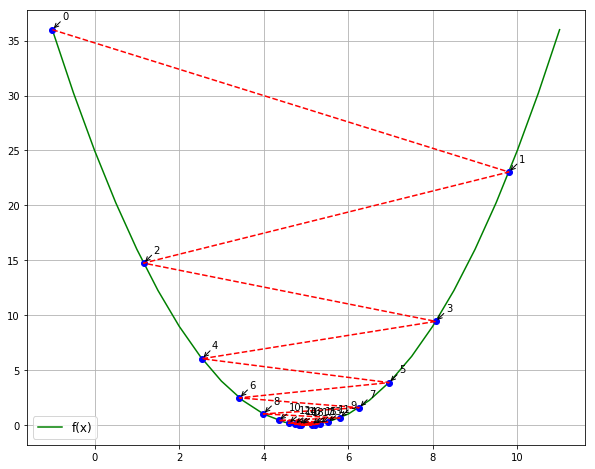

f(x_prev)=0.018, f(x_cur)=0.012, delta=0.007
x_min=4.89, f(x_min)=0.012
---------------------------------------
Не сошелся до шага № 30! Размер шага=1.02


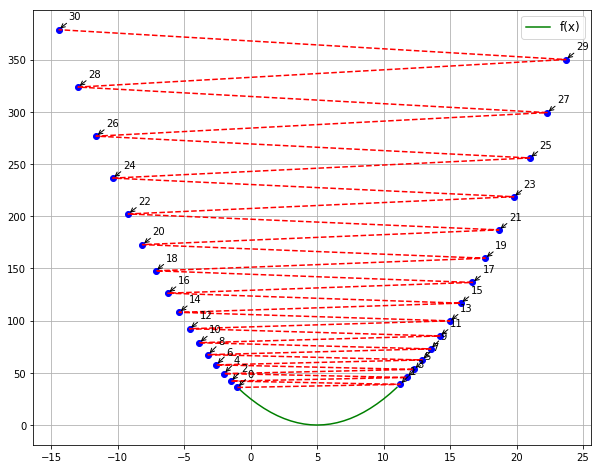

In [4]:
step_count = 30 # число шагов
step_size = [0.1, 0.9, 1.02]  # шаг обучения
epsilon = 0.01 # параметр сходимости

X_GD = [] # x-координаты точек градиентного спуска
Y_GD = [] # y-координаты точек градиентного спуска

# Отрисовка "спуска":
def plot_DG(X_GD, Y_GD):
    plt.figure(figsize=(10, 8))
    plt.plot(X, Y, 'g-', label = "f(x)")
    plt.plot(X_GD, Y_GD, 'bo')
    plt.plot(X_GD, Y_GD, 'r--')
    plt.grid()
    plt.legend(fontsize = 12);
    for i, xy in enumerate(zip(X_GD, Y_GD)):
        plt.annotate('{}'.format(i),
        xy=(xy[0], xy[1]),
            xytext=(10, 10),
            ha='left',
            textcoords='offset points',                        
            arrowprops=dict(arrowstyle='->', shrinkA=0))
    plt.show();

    
for s in step_size:
    previous_x, current_x = X[0], X[0]
    X_GD.append(previous_x), Y_GD.append(func(previous_x))
    for i in range(step_count):
        current_x = previous_x - s * func_derivative(previous_x) 
        X_GD.append(current_x), Y_GD.append(func(current_x))
        # Проверка на сходимость:
        if (abs(func(previous_x) - func(current_x))) < epsilon:
            print("---------------------------------------")
            print("Сошёлся на шаге № {}, размер шага={}:".format(i, s))
            plot_DG(X_GD, Y_GD)
            print("f(x_prev)={:.3f}, f(x_cur)={:.3f}, delta={:.3f}".format(
                func(previous_x),
                func(current_x),
               (func(previous_x)-func(current_x))))
            print("x_min={:.2f}, f(x_min)={:.3f}".format(current_x, func(current_x)))
            X_GD, Y_GD = [], []
            break
        previous_x = current_x
    if i==(step_count-1):
        print("---------------------------------------")
        print("Не сошелся до шага № {}! Размер шага={}".format(step_count, s))
        plot_DG(X_GD, Y_GD)
    